# Financial Fraud Detection

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fraud = pd.read_csv('financial_data.csv')
fraud.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


In [3]:
fraud.shape

(6362620, 11)

# Exploratory Data Analysis

## Data Understanding

In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Fraud dataset contains of 11 columns and more than 6 mio row, with description below:
1. step = unit of time, 1 step is 1 hour so 31 days is 744
2. type = transaction method (CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER)
3. amount = amount of the transaction in local currency
4. nameOrig = customer who started the transaction
5. oldbalanceOrg = initial balance before the transaction
6. newbalanceOrig = new balance after the transaction
7. nameDest = customer who is the recipient of the transaction
8. oldbalanceDest = initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
9. newbalanceDest = new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
10. isFraud = This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
11. isFlaggedFraud = The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [5]:
fraud.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Observation

There is no standart missing value because this dataset is generating by simulator, so it can be ideal dataset with no missing value

In [6]:
fraud.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [7]:
fraud.duplicated().sum()

0

## Observation

There is no duplicate columns

### Statistical Summary

In [8]:
#numerical statistics summary
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Observations

`Amount`, `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, `newbalanceDest` indicate not symetrical distribution

In [9]:
fraud.describe(include= 'object').transpose()

,count,unique,top,freq
type,6362620,5,CASH_OUT,2237500
nameOrig,6362620,6353307,C1902386530,3
nameDest,6362620,2722362,C1286084959,113


## Univariate Analysis

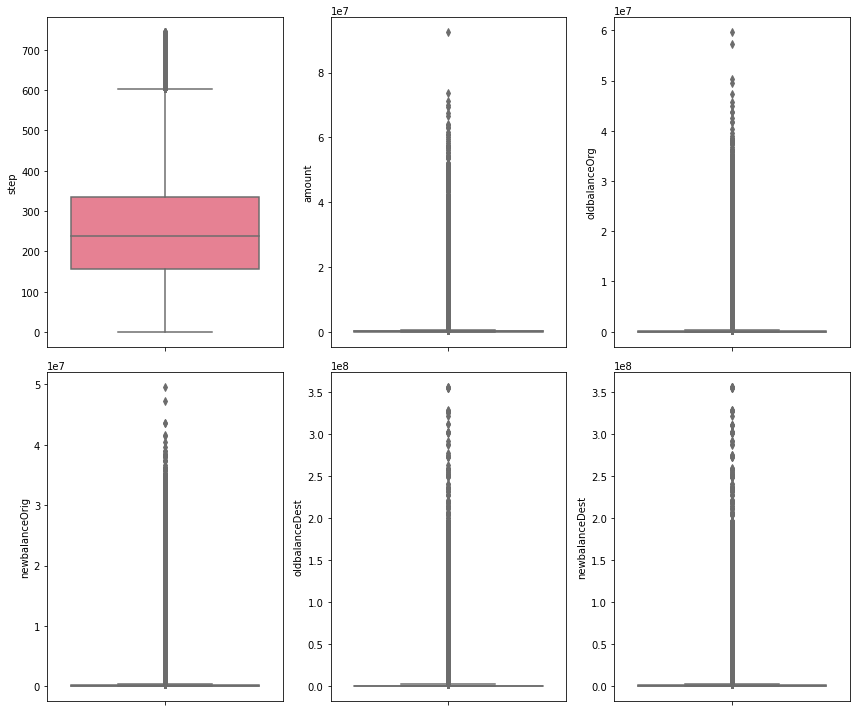

In [10]:
# adjust the figure size for better readability
plt.figure(figsize=(12,10))
numericals = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 
            'oldbalanceDest', 'newbalanceDest', ]

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2, i+1)
    sns.boxplot(y=fraud[features[i]], palette='husl')
    plt.tight_layout()

## Observation 

There is outlier in numerical columns

c:\Users\Titim\Desktop\tf\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Titim\Desktop\tf\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Titim\Desktop\tf\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

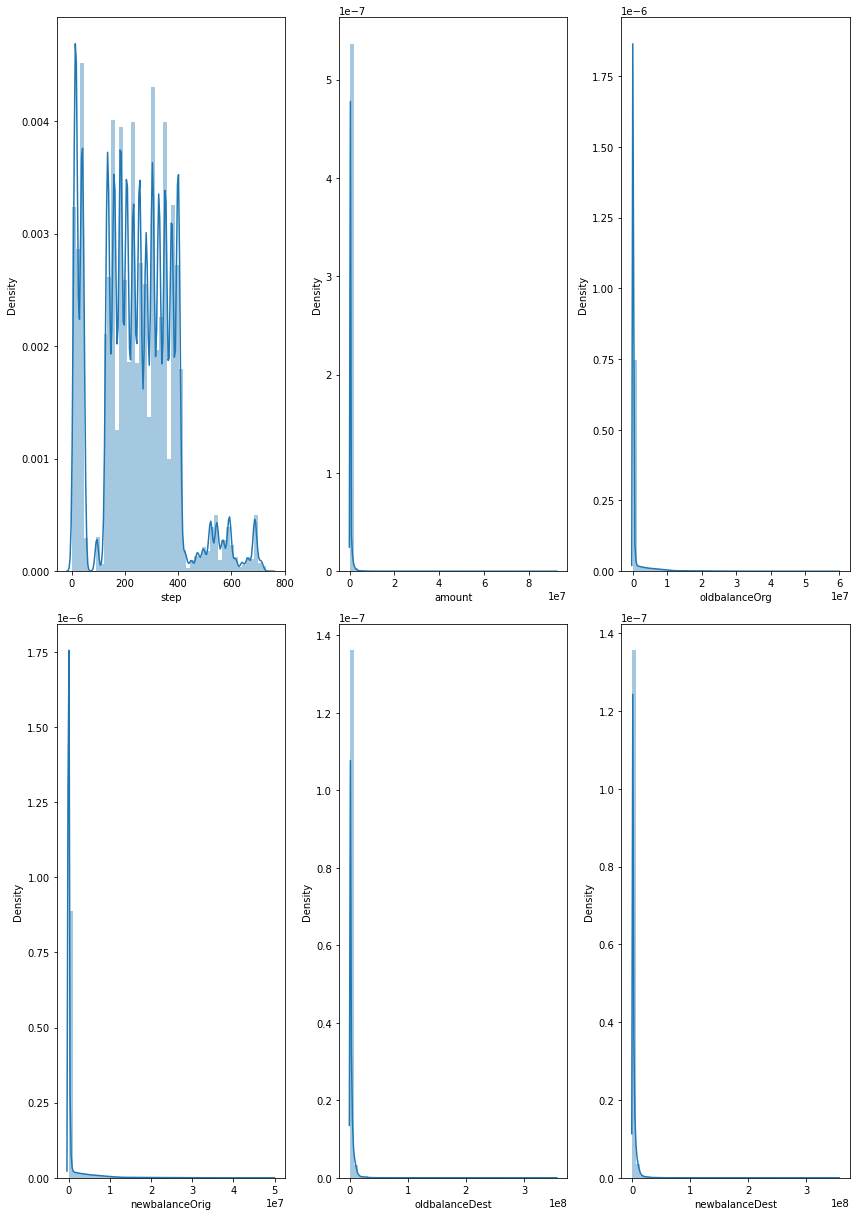

In [12]:
# adjust the figure size for better readability
plt.figure(figsize=(17,12))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2, i+1)
    sns.distplot(x=fraud[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

## Bivatiate Analysis

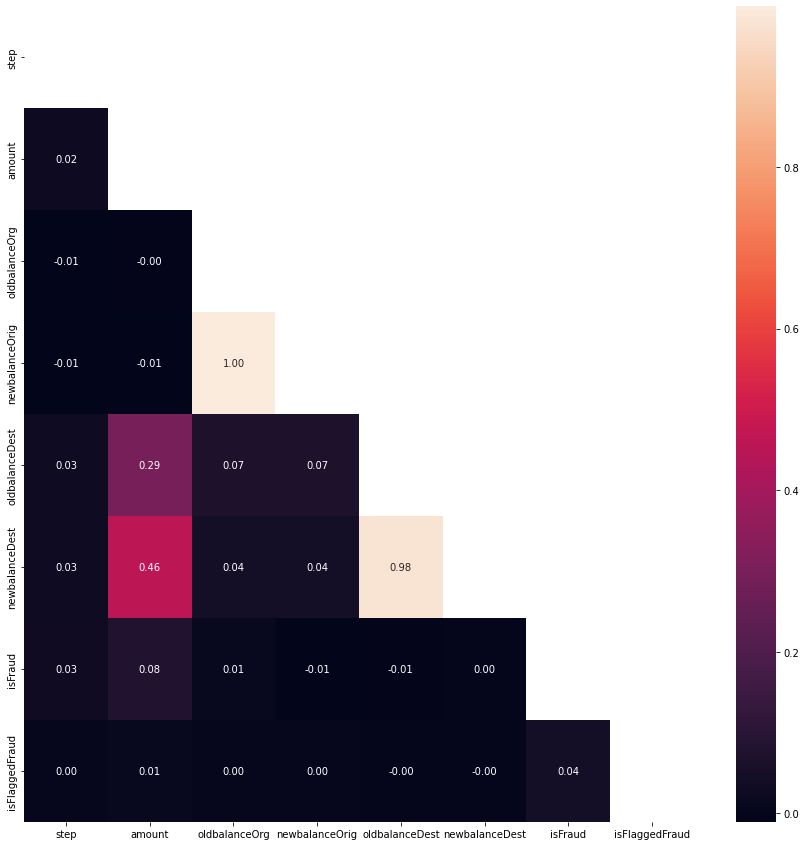

In [14]:
corr = fraud.corr()

plt.figure(figsize=(15,15))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f')
plt.show()

## Observation

1. seems no correlation (small) among target value (isFraud) with other columns
2. there is multicollinearity in this data

<AxesSubplot:xlabel='isFraud', ylabel='count'>

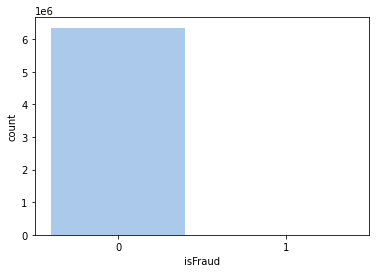

In [16]:
sns.countplot(data=fraud,
            x='isFraud',
            palette="pastel")

<AxesSubplot:xlabel='isFraud', ylabel='count'>

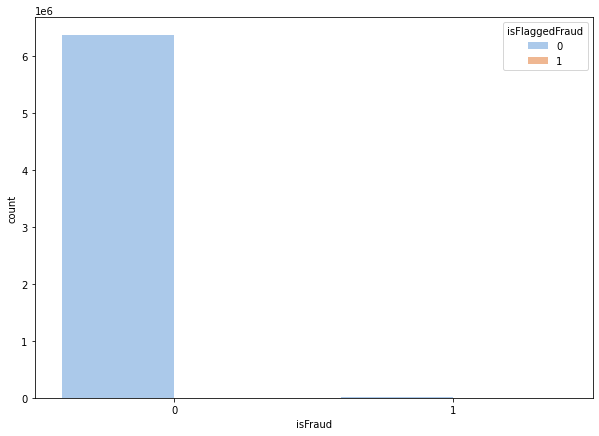

In [18]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(data=fraud,
            x='isFraud',
            hue='isFlaggedFraud',
            palette= 'pastel')

<AxesSubplot:xlabel='isFraud', ylabel='count'>

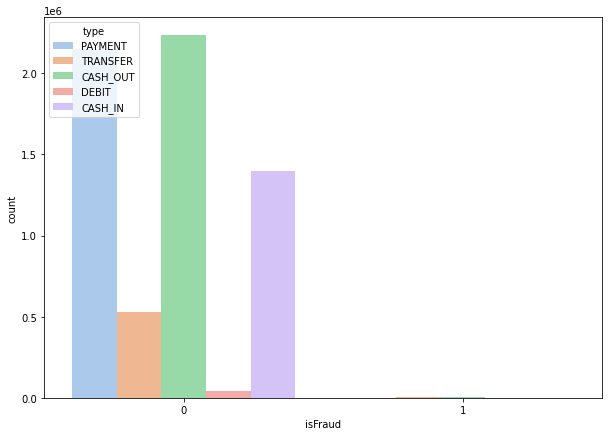

In [20]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(data=fraud,
            x='isFraud',
            hue='type',
            palette= 'pastel')

In [43]:
fraud.groupby('isFraud').agg('count')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,,,,
0,6354407,6354407,6354407,6354407,6354407,6354407,6354407,6354407,6354407,6354407
1,8213,8213,8213,8213,8213,8213,8213,8213,8213,8213


In [22]:
isfraud = fraud[fraud['isFraud'] == 1]
isfraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


<AxesSubplot:xlabel='isFraud', ylabel='count'>

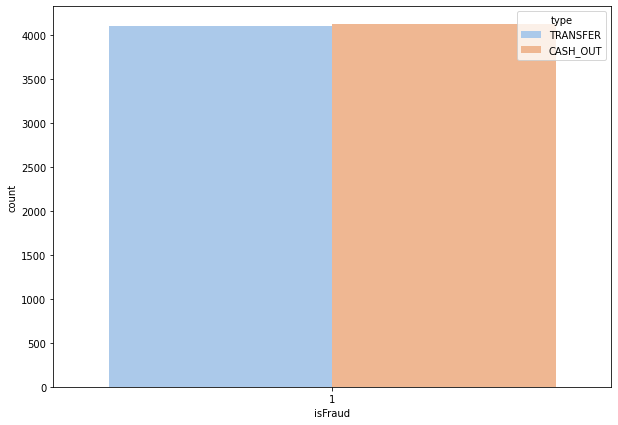

In [24]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(data=isfraud,
            x='isFraud',
            hue='type',
            palette= 'pastel')

In [25]:
isfraud['type'].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

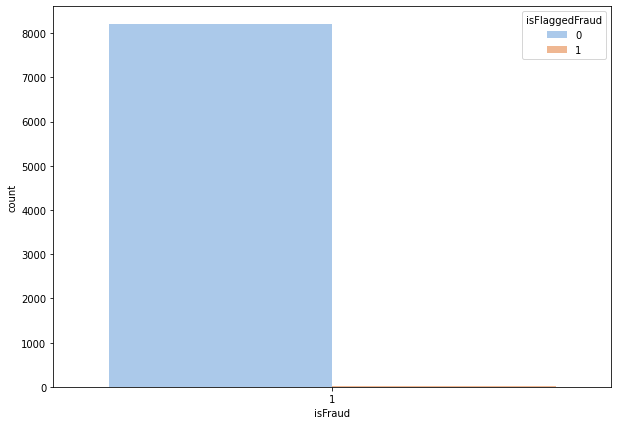

In [28]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(data=isfraud,
            x='isFraud',
            hue='isFlaggedFraud',
            palette= 'pastel')